In [1]:
import numpy as np #deals with arrays
import matplotlib.pyplot as plt #plotting package
#%matplotlib inline
import xarray as xr #deals with multidimensional arrays
import seaborn as sns; sns.set(color_codes=True) # plotting aes
plt.style.use('ggplot')
import pandas as pd   #builds data frames
from pandas import DataFrame
from pandas import Grouper
import netCDF4 as nc  #deals with nc files
from mpl_toolkits.basemap import Basemap # plots maps
import csv     #outputs data as csv 
%config Completer.use_jedi = False

In [2]:
sicnc = nc.Dataset('/Volumes/WorkDrive/melt_dates/seaiceconc.nc')
latitude = sicnc.variables['GridLat_SpPolarGrid12km'][:]
longitude = sicnc.variables['GridLon_SpPolarGrid12km'][:]

In [3]:
data = xr.open_dataset('/Volumes/WorkDrive/melt_dates/mean/mergedBU_files.nc') 
#/Volumes/WorkDrive/melt_dates/mean/merged_years_nan.nc
#/Volumes/WorkDrive/melt_dates/mean/merged_years.nc

In [4]:
data_np = data['__xarray_dataarray_variable__']

In [5]:
data_np.dtype

dtype('float32')

In [6]:
ice = data_np.values
ice = ice.astype(np.float32)
## now that our data is a numpy array, we can convert the zeros and two's into NaNs for a cleaner plot ##
BU_nan =  ice.copy()
BU_nan[BU_nan == 0.0] = np.nan
# BU_nan[BU_nan == 1.0] = np.nan
# BU_nan[BU_nan == 2.0] = np.nan
# BU_nan[BU_nan == 3.0] = np.nan
BU_nan[BU_nan == 4.0] = np.nan

#breakup = xr.DataArray(BU_nan)

In [7]:
graph= np.nanmean(BU_nan, axis=0)

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_63540/3239239814.py:1: RuntimeWarning: Mean of empty slice
  graph= np.nanmean(BU_nan, axis=0)


In [8]:
graph = xr.DataArray(graph)

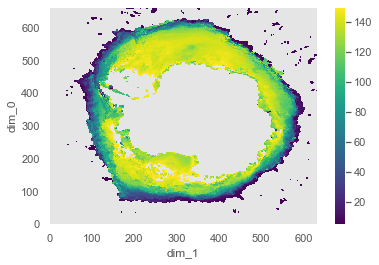

In [9]:
graph.plot()

In [10]:
#a = data_np.mean(axis=0)

In [11]:
#b = np.nanmean(data_np, axis=0)

In [12]:
#c = np.average(data_np, axis=0)

In [13]:
#b = xr.DataArray(b)

In [14]:
mean = xr.DataArray(graph)
mean = xr.DataArray(data=graph,
                     dims=["ygrid","xgrid"],
                     coords=dict(
                         longitudes=(["ygrid","xgrid"],longitude),
                         latitudes=(["ygrid","xgrid"],latitude),
                                ),
                     attrs=dict(description="Sea Ice Breakup Mean",
                               ),
                    )

In [15]:
mean.to_netcdf('/Volumes/WorkDrive/melt_dates/mean/12-23_meanbreakup.nc')